In [1231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1232]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

In [1233]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1234]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1235]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1236]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [1237]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1238]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1239]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

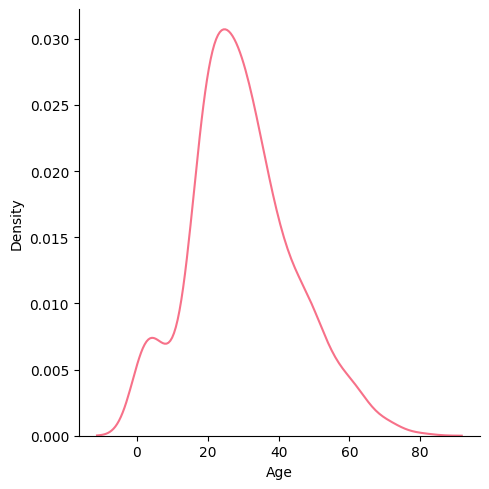

In [1240]:
import seaborn as sns
sns.set_palette('husl')
sns.displot(data=data, x=data['Age'], kind='kde')

In [1241]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

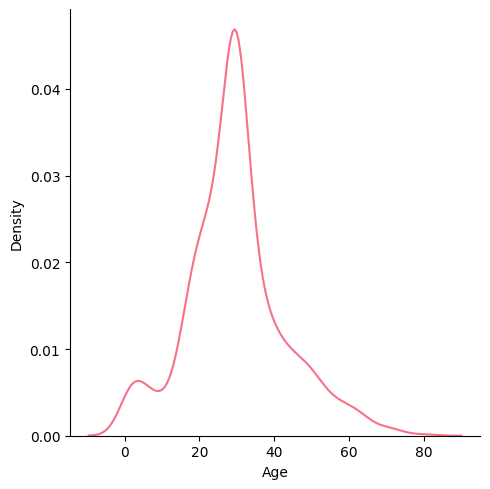

In [1242]:
sns.set_palette('husl')
sns.displot(data=data, x=data['Age'], kind='kde')

In [1243]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

<AxesSubplot: xlabel='Embarked', ylabel='count'>

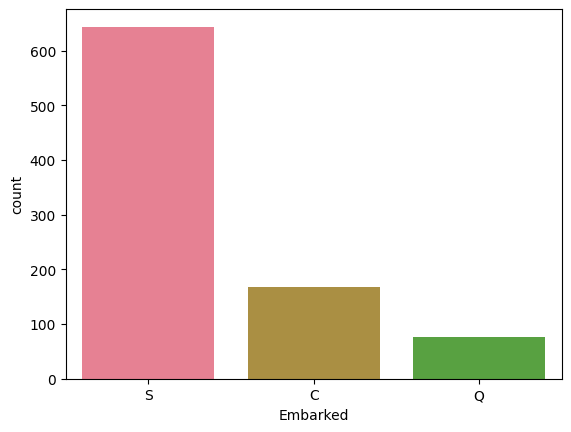

In [1244]:
sns.countplot(data=data, x='Embarked')

In [1245]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1246]:
data['Embarked'].fillna('None', inplace=True)
test['Embarked'].fillna('None', inplace=True)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

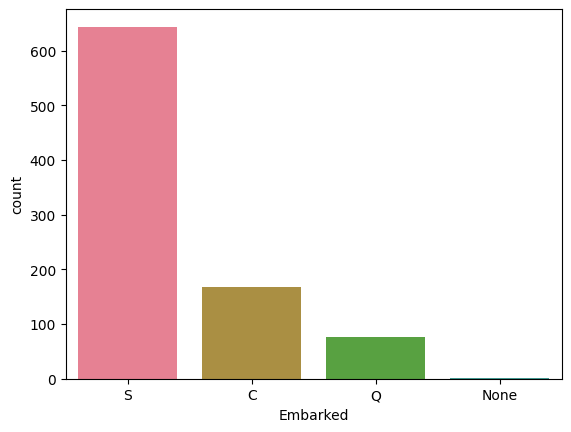

In [1247]:
sns.countplot(data=data, x='Embarked')

In [1248]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1249]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

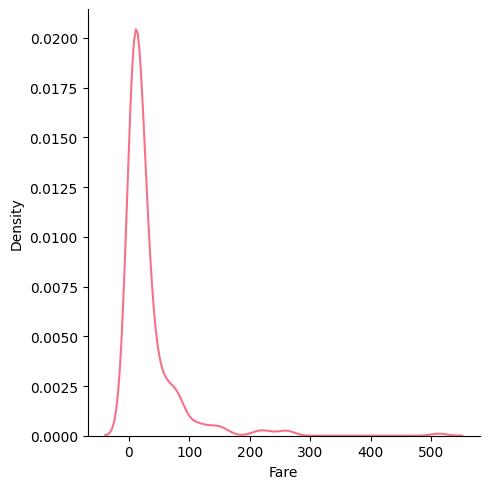

In [1250]:
sns.set_palette('husl')
sns.displot(data=test, x=data['Fare'], kind='kde')

In [1251]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

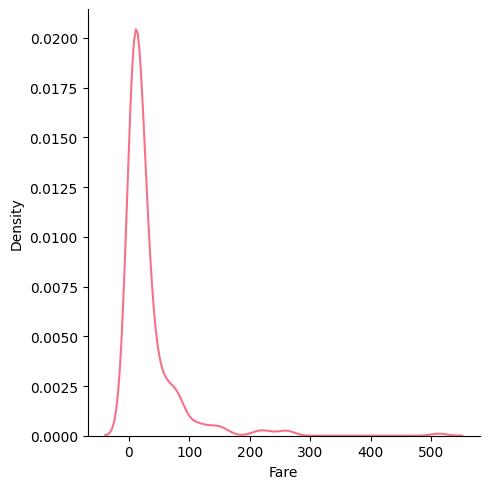

In [1252]:
sns.set_palette('husl')
sns.displot(data=test, x=data['Fare'], kind='kde')

In [1253]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1254]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1255]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Sex', 'Embarked']

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])

In [1256]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


In [1257]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,3
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,3
4,3,0,22.0,1,1,12.2875,3


In [1258]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [1259]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Feature scaling

In [1260]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
test = sc.transform(test)

## Logistic Regresision

In [1261]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [1262]:
y_pred_logistic = lr_classifier.predict(x_val)

In [1263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_logistic)

0.8044692737430168

## naive bayes

In [1264]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(x_train, y_train)

GaussianNB()

In [1265]:
y_pred_naive = naive_classifier.predict(x_val)

In [1266]:
accuracy_score(y_val, y_pred_naive)

0.776536312849162

## SVM

In [1267]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [1268]:
y_pred_svm = svm_classifier.predict(x_val)

In [1269]:
accuracy_score(y_val, y_pred_svm)

0.7821229050279329

## KNN

In [1270]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [1271]:
y_pred_knn = knn_classifier.predict(x_val)

In [1272]:
accuracy_score(y_val, y_pred_knn)

0.8044692737430168

## Decision Tree

In [1273]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiontree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [1274]:
y_pred_decisiontree = decisiontree_classifier.predict(x_val)

In [1275]:
accuracy_score(y_val, y_pred_decisiontree)

0.7988826815642458

## Random forest tree

In [1276]:
from sklearn.ensemble import RandomForestClassifier
rft_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rft_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [1277]:
y_pred_rft = rft_classifier.predict(x_val)

In [1278]:
accuracy_score(y_val, y_pred_rft)

0.8212290502793296

## submission

In [1279]:
sub_predicts = lr_classifier.predict(test)

In [1280]:
df = pd.DataFrame({"PassengerId":test_ids.values,
                   "Survived": sub_predicts
                   })

In [1281]:
df.to_csv("submission.csv", index=False)